<a href="https://colab.research.google.com/github/shaoyuCheng311/empirical_finance/blob/main/ESG_Fama_French_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip --quiet install pandas-datareader
!pip --quiet install yfinance

In [ ]:
import pandas_datareader.data as reader
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import yfinance as yf

In [ ]:
df_esg=pd.read_csv('df_monthly_adobe.csv')
df_esg=df_esg.set_index('Date')
df_esg=df_esg[:59]

In [ ]:
df_esg.tail()

,AvgTone
Date,
2021-06-30,57.121221
2021-07-31,57.128547
2021-08-31,57.121180
2021-09-30,57.271274
2021-10-31,57.051784


In [ ]:
# df_esg=df_esg['AvgTone'].pct_change()

In [ ]:
end = dt.date(2021,12,1)
start = dt.date(2016,12,1)
funds = ['ADBE']

In [ ]:
fundsret = pd.DataFrame()
for stock in funds:
    fundsret[stock] = yf.download(stock, data_source="yahoo", start=start,end=end)['Adj Close'].pct_change()
fundsret.head()


[*********************100%***********************]  1 of 1 completed


,ADBE
Date,
2016-12-01,NaN
2016-12-02,0.002211
2016-12-05,0.022260
2016-12-06,-0.003923
2016-12-07,0.017824


In [ ]:
fundsret_mtl = fundsret.resample('M').agg(lambda x:(x+1).prod()-1)
fundsret_mtl = fundsret_mtl[1:]
fundsret_mtl

,ADBE
Date,
2017-01-31,0.101311
2017-02-28,0.043747
2017-03-31,0.099628
2017-04-30,0.027741
2017-05-31,0.060715
2017-06-30,-0.002961
2017-07-31,0.035704
2017-08-31,0.059185
2017-09-30,-0.038541


In [ ]:
factors = reader.DataReader('F-F_Research_Data_Factors','famafrench',start,end)[0]
# factors = factors[1:]


In [ ]:
fundsret_mtl.shape

(59, 1)

In [ ]:
factors.shape

(59, 4)

In [ ]:
df_esg.shape

(59, 1)

In [ ]:
fundsret_mtl.index = factors.index

In [ ]:
merge = pd.merge(fundsret_mtl,factors, on = 'Date')

In [ ]:
merge['ADBE-RF'] = merge.ADBE - merge.RF


In [ ]:
merge.tail()

,ADBE,Mkt-RF,SMB,HML,RF,ADBE-RF
Date,,,,,,
2021-06,0.061454,2.75,1.80,-7.76,0.0,0.061454
2021-07,0.067677,1.27,-3.96,-1.75,0.0,0.067677
2021-08,-0.132560,2.90,-0.48,-0.13,0.0,-0.132560
2021-09,0.129646,-4.37,0.80,5.09,0.0,0.129646
2021-10,0.029968,6.65,-2.28,-0.45,0.0,0.029968


In [ ]:
df_esg.index=merge.index

In [ ]:
merge_2 = pd.merge(merge,df_esg, on = 'Date')

In [ ]:
merge_2.tail()

,ADBE,Mkt-RF,SMB,HML,RF,ADBE-RF,AvgTone
Date,,,,,,,
2021-06,0.061454,2.75,1.80,-7.76,0.0,0.061454,57.121221
2021-07,0.067677,1.27,-3.96,-1.75,0.0,0.067677,57.128547
2021-08,-0.132560,2.90,-0.48,-0.13,0.0,-0.132560,57.121180
2021-09,0.129646,-4.37,0.80,5.09,0.0,0.129646,57.271274
2021-10,0.029968,6.65,-2.28,-0.45,0.0,0.029968,57.051784


In [ ]:
y = merge_2['ADBE-RF']
X = merge_2[['Mkt-RF','SMB','HML','AvgTone']]

X_sm = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ADBE-RF   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9911
Date:                Sat, 11 Dec 2021   Prob (F-statistic):              0.420
Time:                        17:15:57   Log-Likelihood:                 50.622
No. Observations:                  59   AIC:                            -91.24
Df Residuals:                      54   BIC:                            -80.86
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1542      0.868     -0.178      0.860      -1.895       1.587
Mkt-RF         0.0031      0.003      0.969      0.337      -0.003       0.009
SMB            0.0040      0.006      0.715      0.478      -0.007       0.015
HML            0.0039      0.004      0.975      0.334      -0.004       0.012
AvgTone        0.0018      0.016      0.114      0.909      -0.029       0.033
==============================================================================
Omnibus:                        0.964   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.958
Skew:                          -0.148   Prob(JB):                        0.619
Kurtosis:                       2.451   Cond. No.                     3.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
!pip install --quiet pingouin
import pingouin as pg

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np

In [ ]:
pg.linear_regression(np.log(df[['AvgTone']]), np.log(df['Adj Close']))

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-91.086881,8.799440,-10.351441,1.044190e-14,0.679439,0.673815,-108.707455,-73.466306
1,AvgTone,24.062248,2.189169,10.991497,1.049752e-15,0.679439,0.673815,19.678512,28.445984


In [ ]:
merge_2

In [ ]:
import yfinance as yf

ADBE = yf.Ticker("ADBE")
data = yf.download("ADBE", start="2016-12-01", end="2021-10-31")[['Adj Close']]
data=data.resample('M').mean()

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.index=df_esg.index

In [ ]:
df = pd.merge(data,df_esg, on = 'Date')

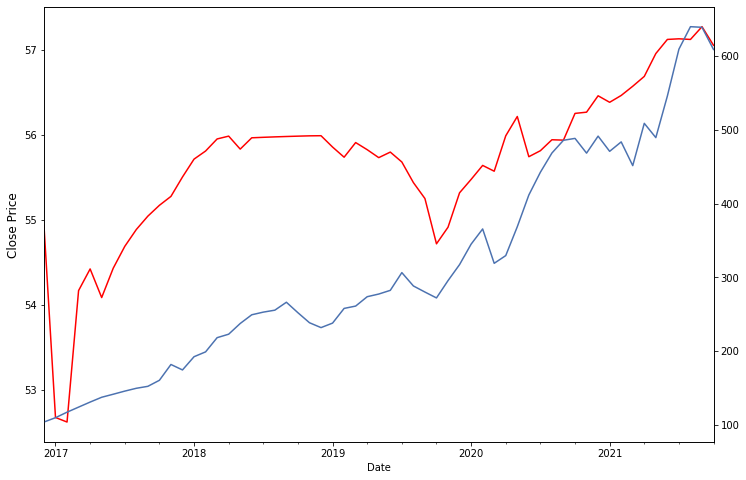

In [ ]:
import matplotlib.pyplot as plt
df_esg["AvgTone"].plot(figsize=(12,8),fontsize=10,color='r')
plt.ylabel('Close Price', fontsize=12)
data["Adj Close"].plot(figsize=(12,8),fontsize=10,secondary_y=True)

plt.xlabel('Date', fontsize=12)
# df["MA 20"][20:].plot(figsize=(10,5),color="Red")
plt.show()